
### Weather Tool Information Retrival

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
sys.path.append('../scripts')

In [3]:
# Configuración de estilo
plt.style.use('ggplot')
sns.set_palette("husl")


#### OpenMeteo || Historía meteorologíca.

In [ ]:
from weather_tools import WeatherDataFetcher

In [ ]:
fetcher = WeatherDataFetcher()

print("Variables disponibles:")
print(fetcher.get_available_variables())

In [ ]:
# Coordenadas de ejemplo (Buenos Aires)
lat = -39.422539
lon = -71.936493
start_date = "2024-12-01"
end_date = "2025-03-10"

print(f"Obteniendo datos para:")
print(f"Coordenadas: ({lat}, {lon})")
print(f"Período: {start_date} a {end_date}")

In [ ]:
df_weather = fetcher.fetch_weather_data(lat, lon, start_date, end_date)

fetcher.save_to_csv(df_weather, "datos_clima_historico.csv")

# También guardar en data/processed
processed_dir = "../data/raw/open_meteo"
os.makedirs(processed_dir, exist_ok=True)
df_weather.to_csv(f"{processed_dir}/clima_procesado.csv", index=False)

print("💾 Datos guardados exitosamente!")

In [ ]:
print("✅ Datos obtenidos exitosamente!")
print(f"📊 Dimensiones: {df_weather.shape}")
print(f"📋 Columnas: {list(df_weather.columns)}")

print("\n📅 Rango temporal:")
print(f"   Inicio: {df_weather['datetime'].min()}")
print(f"   Fin: {df_weather['datetime'].max()}")

print("\n🔍 Primeras filas:")
display(df_weather.head())

print("\n📈 Estadísticas descriptivas:")
display(df_weather.describe())

In [ ]:
if not df_weather.empty:
    # Copia + Filtro de Fecha
    df_isolated = df_weather.copy()
    df_isolated = df_isolated[df_isolated['date'] < datetime.date(2024, 12, 25)]

    fig, axes = plt.subplots(3, 2, figsize=(15, 12))

    # Temperatura
    df_isolated.plot(x='datetime', y='temperature', ax=axes[0,0], title='Temperatura (°C)', color='red')
    axes[0,0].set_ylabel('Temperatura (°C)')
    
    # Humedad
    df_isolated.plot(x='datetime', y='humidity', ax=axes[0,1], title='Humedad Relativa (%)', color='blue')
    axes[0,1].set_ylabel('Humedad (%)')
    
    # Precipitación
    df_isolated.plot(x='datetime', y='precipitation', ax=axes[1,0], title='Precipitación (mm)', color='green')
    axes[1,0].set_ylabel('Precipitación (mm)')
    
    # Velocidad del viento
    df_isolated.plot(x='datetime', y='wind_speed', ax=axes[1,1], title='Velocidad del Viento (km/h)', color='orange')
    axes[1,1].set_ylabel('Velocidad (km/h)')
    
    # Presión atmosférica
    df_isolated.plot(x='datetime', y='pressure', ax=axes[2,0], title='Presión Atmosférica (hPa)', color='purple')
    axes[2,0].set_ylabel('Presión (hPa)')
    
    # Cobertura de nubes
    df_isolated.plot(x='datetime', y='cloud_cover', ax=axes[2,1], title='Cobertura de Nubes (%)', color='gray')
    axes[2,1].set_ylabel('Cobertura (%)')
    
    plt.tight_layout()
    plt.show()

In [ ]:
print("📊 Resumen por día:")
df_daily = df_weather.groupby('date').agg({
    'temperature': ['mean', 'min', 'max'],
    'humidity': 'mean',
    'pressure': 'mean',
    'wind_speed': 'mean',
    'precipitation': 'sum',
    'rain': 'sum',
    'snowfall': 'sum',
    'sunshine_hours': 'sum'
}).round(2)

df_daily.columns = [
    'temp_promedio', 'temp_min', 'temp_max', 
    'humedad_promedio', 'presion_promedio', 
    'viento_promedio', 'precipitacion_total',
    'lluvia_total', 'nieve_total', 'horas_sol'
]

display(df_daily)

In [ ]:
print("🔗 Matriz de correlación:")
numeric_cols = ['temperature', 'humidity', 'pressure', 'wind_speed', 'precipitation']
corr_matrix = df_weather[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Matriz de Correlación - Variables Meteorológicas')
plt.tight_layout()
plt.savefig('../docs/correlacion_clima.png', dpi=300, bbox_inches='tight')
plt.show()


#### Climate Data Store (CDS) - Copernicus || Temperatura 2 metros.

In [5]:
from cds_tools import CDSTools

In [6]:
# Obtener datos ERA5
lat = -39.422539
lon = -71.936493
start_date = "2024-12-01"
end_date = "2024-12-01"

cds = CDSTools()

# Obtener datos de temperatura
df_temp = cds.get_climate_data('2m_temperature', start_date, end_date, lat, lon, radius = 0.5, format = 'netcdf')
df_temp

2025-09-03 16:37:46,775 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.


2025-09-03 16:37:46 - ecmwf.datastores.legacy_client - INFO - [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-09-03 16:37:46 - cds_tools - INFO - Cliente CDS inicializado correctamente
2025-09-03 16:37:46 - cds_tools - INFO - Rango de fechas validado: 2024-12-01 a 2024-12-01
2025-09-03 16:37:46 - cds_tools - INFO - Parámetros de solicitud construidos para área: -38.922539N, -72.436493W, -39.922539S, -71.436493E
2025-09-03 16:37:46 - cds_tools - INFO - Rango temporal: 2024-12-01 a 2024-12-01
2025-09-03 16:37:46 - cds_tools - INFO - Iniciando descarga de datos para 2m_temperature...
2025-09-03 16:37:46 - cds_tools - INFO - Parámetros de la solicitud: {'product_type': 'reanalysis', 'variable': '2m_temperature', 'year': ['2024'], 'month': ['12'], 'day': ['01'], 'time': ['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:

2025-09-03 16:37:47,689 INFO Request ID is 9e19bd2f-ec94-477b-a930-0c3e0a7e678c


2025-09-03 16:37:47 - ecmwf.datastores.legacy_client - INFO - Request ID is 9e19bd2f-ec94-477b-a930-0c3e0a7e678c


2025-09-03 16:37:47,968 INFO status has been updated to accepted


2025-09-03 16:37:47 - ecmwf.datastores.legacy_client - INFO - status has been updated to accepted


2025-09-03 16:37:53,771 INFO status has been updated to running


2025-09-03 16:37:53 - ecmwf.datastores.legacy_client - INFO - status has been updated to running


2025-09-03 16:38:02,827 INFO status has been updated to successful


2025-09-03 16:38:02 - ecmwf.datastores.legacy_client - INFO - status has been updated to successful
2025-09-03 16:38:03 - multiurl.base - INFO - Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache-3/2025-08-30/74fa8b894d1ff874a0b6ffcd3ca66afc.nc


74fa8b894d1ff874a0b6ffcd3ca66afc.nc:   0%|          | 0.00/26.1k [00:00<?, ?B/s]

2025-09-03 16:38:06 - cds_tools - INFO - Datos descargados correctamente en: data\raw\reanalysis-era5-single-levels_2m_temperature_2024-12-01_2024-12-01_-39.422539_-71.936493.netcdf
2025-09-03 16:38:06 - cds_tools - INFO - Procesando archivo NetCDF: data\raw\reanalysis-era5-single-levels_2m_temperature_2024-12-01_2024-12-01_-39.422539_-71.936493.netcdf
2025-09-03 16:38:07 - cds_tools - INFO - Datos procesados guardados en: ..\data\raw\copernicus\reanalysis-era5-single-levels_2m_temperature_2024-12-01_2024-12-01_-39.422539_-71.936493.csv


,valid_time,t2m,number,latitude,longitude,expver
0,2024-12-01 00:00:00,284.898926,0,-39.422,-71.9365,0001
1,2024-12-01 01:00:00,283.421875,0,-39.422,-71.9365,0001
2,2024-12-01 02:00:00,282.503052,0,-39.422,-71.9365,0001
3,2024-12-01 03:00:00,282.553345,0,-39.422,-71.9365,0001
4,2024-12-01 04:00:00,282.222290,0,-39.422,-71.9365,0001
5,2024-12-01 05:00:00,282.123901,0,-39.422,-71.9365,0001
6,2024-12-01 06:00:00,282.091797,0,-39.422,-71.9365,0001
7,2024-12-01 07:00:00,281.219971,0,-39.422,-71.9365,0001
8,2024-12-01 08:00:00,280.698975,0,-39.422,-71.9365,0001
9,2024-12-01 09:00:00,279.801147,0,-39.422,-71.9365,0001



### Fire Tool Information Retrival.


#### FIRMS || Focos de Calor.

In [ ]:
from firms_tools import FIRMSTools
from project_config import ProjectConfig

# Inicializar herramientas
config = ProjectConfig()
firms = FIRMSTools(config)

# Descargar datos
print("Descargando datos de FIRMS...")
# raw_data = firms.download_fire_data(source='MODIS_SP')
raw_data = firms.get_multisource_fire_data()

# if raw_data is not None and not raw_data.empty:
#     print(f"✓ Datos descargados exitosamente: {len(raw_data)} registros")
#     print(f"Columnas: {list(raw_data.columns)}")
    
#     # Procesar datos
#     processed_data = firms.process_fire_data(raw_data)
#     print(f"Datos procesados: {len(processed_data)} registros")
    
#     # Mostrar información básica
#     print(f"\n📊 Resumen de datos:")
#     print(f"Rango temporal: {processed_data['acq_date'].min()} to {processed_data['acq_date'].max()}")
#     print(f"Número de días con datos: {processed_data['acq_date'].nunique()}")
    
#     if 'confidence' in processed_data.columns:
#         print(f"Distribución de confianza:")
#         print(processed_data['confidence'].value_counts())
    
#     # Visualización rápida
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
#     # Distribución temporal
#     daily_counts = processed_data['acq_date'].value_counts().sort_index()
#     daily_counts.plot(ax=ax1, kind='bar', title='Detecciones por día')
#     ax1.tick_params(axis='x', rotation=45)
    
#     # Mapa de detecciones
#     geometry = [Point(xy) for xy in zip(processed_data.longitude, processed_data.latitude)]
#     gdf = gpd.GeoDataFrame(processed_data, geometry=geometry, crs="EPSG:4326")
    
#     # Cargar mapa base de Argentina
#     world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")
#     argentina = world[world.NAME == 'Argentina']
    
#     argentina.plot(ax=ax2, color='lightgray', edgecolor='black')
#     gdf.plot(ax=ax2, color='red', markersize=10, alpha=0.7, label='Detecciones')
#     ax2.set_title('Ubicación de detecciones de incendios')
#     ax2.legend()
    
#     plt.tight_layout()
#     plt.show()
# else:
#     print("❌ No se pudieron obtener datos. Revisa los logs para más detalles.")

📊 Cargando datos de incendios...
Total de detecciones: 38
Rango temporal: 2024-12-26 to 2024-12-29
Columnas disponibles: ['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date', 'acq_time', 'satellite', 'instrument', 'confidence', 'version', 'bright_t31', 'frp', 'daynight', 'type']

🔍 Iniciando análisis espacial...
2025-09-03 16:43:20 - spatial_analysis - INFO - GeoDataFrame creado con 38 registros
GeoDataFrame creado: 38 features

📈 Estadísticas espaciales:
total_detections: 38
area_covered_km2: 37.85
mean_frp: 162.5736842105263
max_frp: 1179.5
mean_confidence: 76.57894736842105
detections_per_day: 9.5

🎨 Generando visualizaciones...


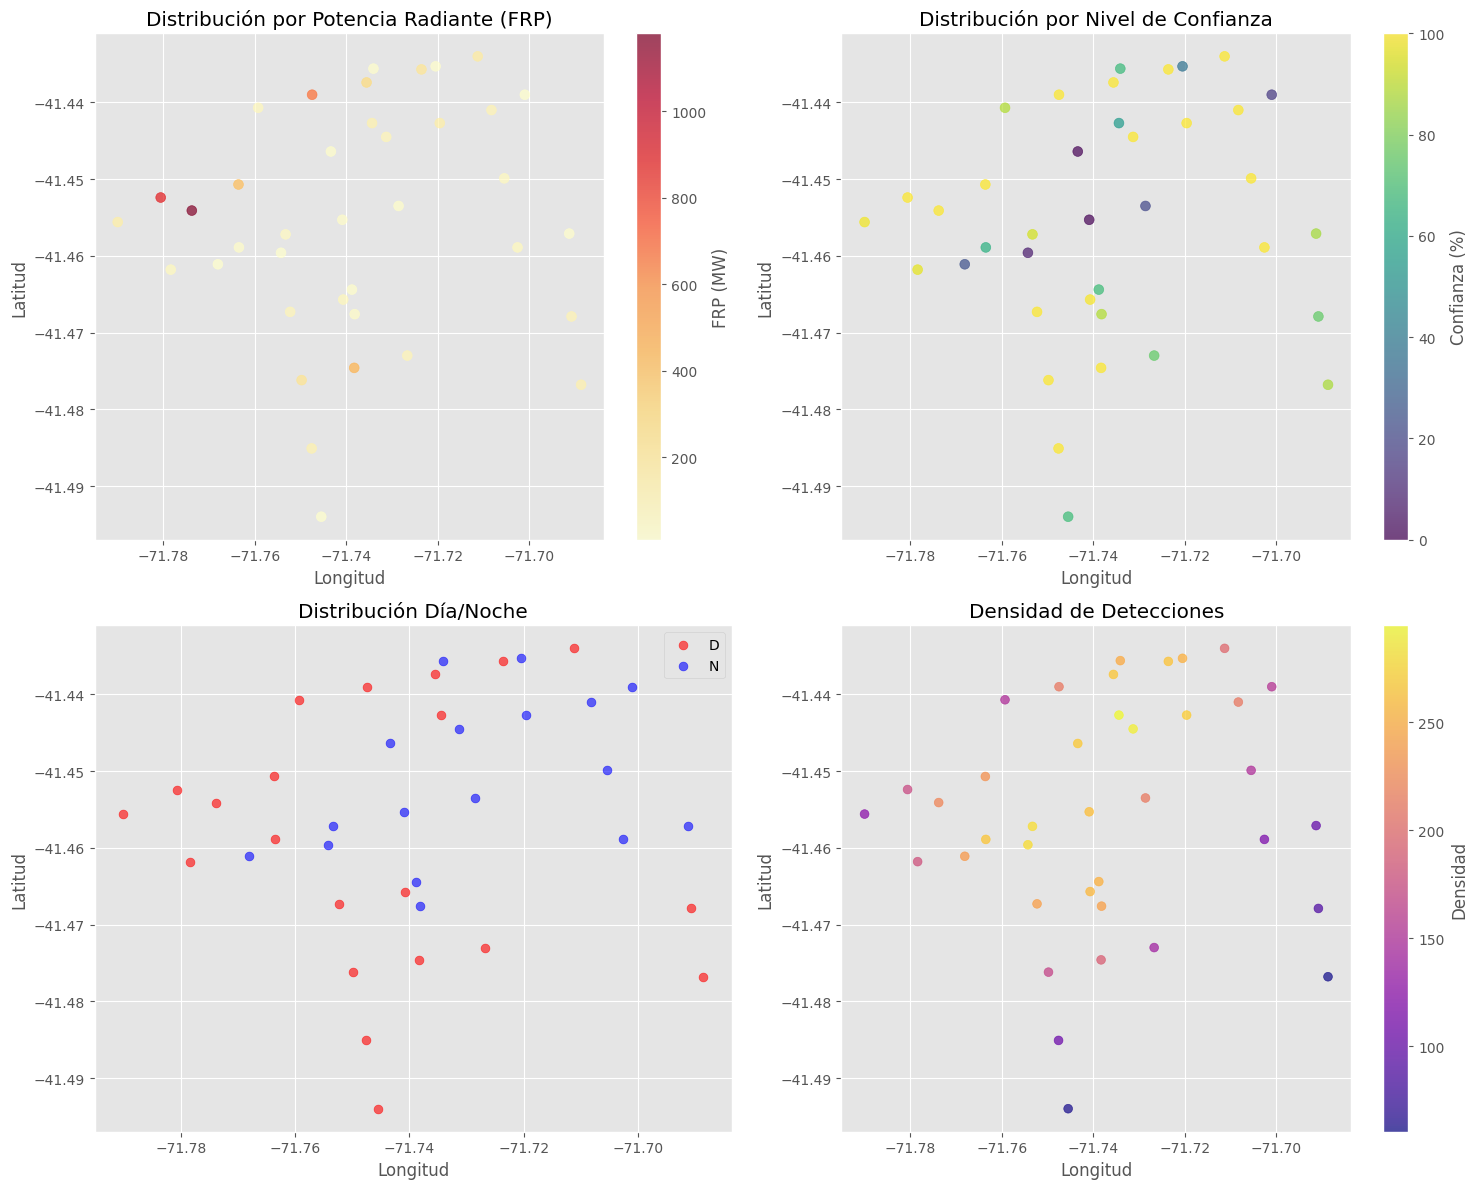


📊 Analizando clusters espaciales...
Estadísticas por cluster:
            frp               confidence latitude longitude
           mean     sum count       mean     mean      mean
cluster                                                    
-1       173.05  6056.9    35      75.86   -41.45    -71.74
 0        40.30   120.9     3      85.00   -41.47    -71.74

🌍 Creando mapa interactivo...
Mapa interactivo guardado como 'interactive_map.html'

💾 Exportando resultados...
2025-09-03 16:43:25 - pyogrio._io - INFO - Created 38 records
2025-09-03 16:43:25 - spatial_analysis - INFO - Resultados exportados a C:\Repositorios\199 - Seminario Final\data\processed
Análisis completado! ✅

🌙 Análisis día vs noche:
             frp               confidence brightness
            mean     sum count       mean       mean
daynight                                            
D         260.87  5478.2    21      90.62     378.74
N          41.15   699.6    17      59.24     329.95

🛰️ Análisis por satéli

In [7]:
import logging
from spatial_analysis import SpatialAnalysis
from project_config import DATA_PROCESSED

# Configuración
logging.basicConfig(level=logging.INFO)
plt.style.use('ggplot')

# Cargar datos
print("📊 Cargando datos de incendios...")
fire_data = pd.read_csv('../data/raw/firms/firms_MODIS_SP_2024-12-20_2024-12-29.csv')

# Mostrar información básica
print(f"Total de detecciones: {len(fire_data)}")
print(f"Rango temporal: {fire_data['acq_date'].min()} to {fire_data['acq_date'].max()}")
print(f"Columnas disponibles: {list(fire_data.columns)}")

# Inicializar análisis espacial
print("\n🔍 Iniciando análisis espacial...")
spatial_analyzer = SpatialAnalysis(fire_data)

# 1. Crear GeoDataFrame
gdf = spatial_analyzer.create_geodataframe()
print(f"GeoDataFrame creado: {len(gdf)} features")

# 2. Calcular estadísticas básicas
stats = spatial_analyzer.calculate_basic_stats()
print("\n📈 Estadísticas espaciales:")
for key, value in stats.items():
    print(f"{key}: {value}")

# 3. Visualización estática
print("\n🎨 Generando visualizaciones...")
spatial_analyzer.plot_spatial_distribution(save_path = '../docs/Entregas/spatial_analysis.png')

# 4. Análisis de clusters
print("\n📊 Analizando clusters espaciales...")
cluster_stats = spatial_analyzer.cluster_analysis()
print("Estadísticas por cluster:")
print(cluster_stats)

# 5. Mapa interactivo (opcional - requiere folium)
try:
    print("\n🌍 Creando mapa interactivo...")
    interactive_map = spatial_analyzer.plot_interactive_map(save_path='../docs/Entregas/interactive_map.html')
    print("Mapa interactivo guardado como 'interactive_map.html'")
except ImportError:
    print("Folium no instalado. Instala con: pip install folium")

# 6. Exportar resultados
print("\n💾 Exportando resultados...")
spatial_analyzer.export_results(DATA_PROCESSED)
print("Análisis completado! ✅")

# Análisis adicional por día/noche
print("\n🌙 Análisis día vs noche:")
day_night_stats = gdf.groupby('daynight').agg({
    'frp': ['mean', 'sum', 'count'],
    'confidence': 'mean',
    'brightness': 'mean'
}).round(2)
print(day_night_stats)

# Análisis por satélite
print("\n🛰️ Análisis por satélite:")
satellite_stats = gdf.groupby('satellite').agg({
    'frp': ['mean', 'sum', 'count'],
    'confidence': 'mean'
}).round(2)
print(satellite_stats)